In [536]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Q1 Read the input file and check the data dimension

In [537]:
#Read input file and understand the data
# "default" is my dependent variable
germancredit_df = pd.read_csv('german_credit.csv')

In [538]:
germancredit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
default                       1000 non-null int64
account_check_status          1000 non-null object
duration_in_month             1000 non-null int64
credit_history                1000 non-null object
purpose                       1000 non-null object
credit_amount                 1000 non-null int64
savings                       1000 non-null object
present_emp_since             1000 non-null object
installment_as_income_perc    1000 non-null int64
personal_status_sex           1000 non-null object
other_debtors                 1000 non-null object
present_res_since             1000 non-null int64
property                      1000 non-null object
age                           1000 non-null int64
other_installment_plans       1000 non-null object
housing                       1000 non-null object
credits_this_bank             1000 non-null int64
job                           1000

In [539]:
# Lets build a Ensemble model but need to modify the dataset first


### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [540]:
# Print Shape of model data
germancredit_df.shape

(1000, 21)

In [541]:
dummy_df = pd.get_dummies(germancredit_df[['account_check_status','credit_history','purpose', 'savings', 'present_emp_since', 'personal_status_sex', 'other_debtors', 'property', 'other_installment_plans', 'housing', 'job', 'telephone', 'foreign_worker']])

In [542]:
dummy_df.shape

(1000, 54)

### Check for highly correlated variables but don't required any treatment for this use case

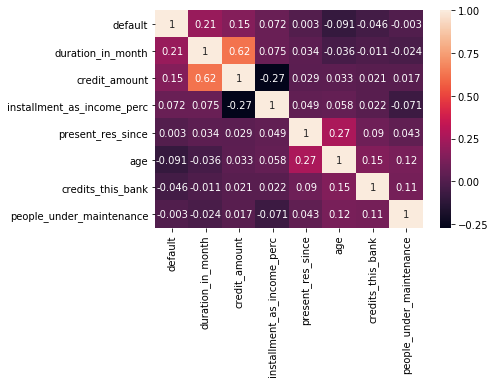

In [543]:
sns.heatmap(germancredit_df.corr(), annot=True)

<b>Inference:</b> <br>High correlation found to exist between credit_amount and duration_in_month
<br>Poor correlation between credit_amount and installment_as_income_perc
<br>Good correlation between age and present_res_since

### Drop the original variables which are converted to dummy

In [544]:
germancredit_df = pd.concat([germancredit_df, dummy_df], axis=1)
germancredit_df.shape

(1000, 75)

In [545]:
germancredit_df = germancredit_df.select_dtypes(exclude=['object'])

In [546]:
germancredit_df.shape

(1000, 62)

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [547]:
x = germancredit_df.drop(["default"], axis = 1)
y = germancredit_df["default"]

In [548]:
print(x.shape)
print(y.shape)

(1000, 61)
(1000,)


In [549]:
from sklearn.model_selection import train_test_split

In [550]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

In [551]:
x_train.shape

(700, 61)

In [552]:
x_test.shape

(300, 61)

### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [553]:
from sklearn.ensemble import RandomForestClassifier

In [554]:
rfcl = RandomForestClassifier(n_jobs=2, criterion="entropy", random_state=9999, n_estimators=500)
rfcl = rfcl.fit(x_train, y_train)

In [555]:
y_test.value_counts()

0    214
1     86
Name: default, dtype: int64

In [556]:
test_pred = rfcl.predict(x_test)
print("Score is: {}".format(rfcl.score(x_test , y_test)))

Score is: 0.7433333333333333


### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [557]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
conf_matrix = confusion_matrix(y_test,test_pred)
conf_matrix

array([[197,  17],
       [ 60,  26]], dtype=int64)

<b>Inference:</b><br>
Confusion Matrix shows 17 False Positives and 60 False Negatives

In [558]:
print("Accuracy score is: {}".format(metrics.accuracy_score(y_test, test_pred)))

Accuracy score is: 0.7433333333333333


### Q6 Show the list of the features importance( 1 Marks)

In [559]:
print (pd.DataFrame(rfcl.feature_importances_, columns = ["Importance"], index = x_train.columns))

                                                    Importance
duration_in_month                                     0.072037
credit_amount                                         0.100113
installment_as_income_perc                            0.036985
present_res_since                                     0.033360
age                                                   0.078122
credits_this_bank                                     0.018879
people_under_maintenance                              0.011346
account_check_status_0 <= ... < 200 DM                0.016711
account_check_status_< 0 DM                           0.030929
account_check_status_>= 200 DM / salary assignm...    0.007338
account_check_status_no checking account              0.044759
credit_history_all credits at this bank paid ba...    0.007700
credit_history_critical account/ other credits ...    0.029383
credit_history_delay in paying off in the past        0.009892
credit_history_existing credits paid back duly ...    0

### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [560]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [561]:
# Use below values
num_folds = 10
seed = 77

In [562]:
#Validate the Random Forest model build above using k fold

In [563]:
kf = KFold(n_splits=num_folds, random_state=seed)
cv_results = cross_val_score(rfcl, x, y, cv=kf, scoring='accuracy')

In [564]:
#Calculate Mean score

In [565]:
print("Mean score for Random Forest is: {}".format(cv_results.mean()))

Mean score for Random Forest is: 0.765


In [566]:
# Calculate score standard deviation using std()

In [567]:
print("Standard Deviation is {}".format(cv_results.std()))

Standard Deviation is 0.049849774322458074


# Q8 Print the confusion matrix( 1 Marks)

In [568]:
kf_ypred = cross_val_predict(rfcl ,x, y, cv=kf)

In [575]:
cv_confmatrix = confusion_matrix(y,kf_ypred)
cv_confmatrix

array([[649,  51],
       [184, 116]], dtype=int64)

# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
(2 Marks)

In [576]:
print("Accuracy is: {}".format(metrics.accuracy_score(y, kf_ypred)))

Accuracy is: 0.765


In [578]:
from sklearn.metrics import classification_report

print(classification_report(y, kf_ypred))

              precision    recall  f1-score   support

           0       0.78      0.93      0.85       700
           1       0.69      0.39      0.50       300

    accuracy                           0.77      1000
   macro avg       0.74      0.66      0.67      1000
weighted avg       0.75      0.77      0.74      1000



[link text](https://)### Bootstrapping ( Bonus and Optional)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [569]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [570]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(x_train, y_train)
    rfcl.fit(X_, y_)
    y_pred = rfcl.predict(x_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [571]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Average: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Average:  0.751
Standard deviation:  0.014985177861992681
